In [1]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import glob
import os
from dotenv import load_dotenv
from mymodule import myfunc as mf
load_dotenv()
imgout = os.environ["imgout"]
root_dir = os.environ["root_dir"]
indir = imgout + "77AVS/"
# outdir = "../imgout/AVSsplit/"
outdir  = "../imgout/77AVSsplit1/"


In [4]:
#o点が見えるように分けた 77AVSsplit1
sep = [[120,440],[380,700],[630,950],[890,1210],[1200,1520],[1460,1780],[1720,2040],[1980,2300],[2240,2560]]

#X点が見えるように分けた 77AVSsplit2
# sep = [[270,590],[520,840],[770,1090],[1000,1320],[1320,1640],[1580,1900],[1890,2210],[2100,2420],[2360,2680]]
sepy = [330,650]
for path in glob.glob(f"{indir}*.jpg"):
# for path in [f"{indir}img00_00554.jpg"]:
    print(path)        
    im = cv2.imread(path)
    name = os.path.basename(path)
    for s in range(len(sep)):
        separated_im = im[sepy[0]:sepy[1],sep[s][0]:sep[s][1]]
        cv2.imwrite(outdir + f"{s}/{s}_{name}", separated_im)
for s in range(len(sep)):
    for path in glob.glob(f"{outdir}{s}"):
        f = open(f"{path}/description_{s}.txt", mode = "w")
        f.write(f"このファイルは{os.path.basename(os.path.dirname(indir))}{im.shape}を\n X{sep[s][0]}:{sep[s][1]}\n Y{sepy[0]}:{sepy[1]}\nで切り取った")
        f.close()

C:/Users/TsugiKawa/Desktop/research_kawa/imgout/77AVS\img00_00200.jpg
C:/Users/TsugiKawa/Desktop/research_kawa/imgout/77AVS\img00_00201.jpg
C:/Users/TsugiKawa/Desktop/research_kawa/imgout/77AVS\img00_00202.jpg
C:/Users/TsugiKawa/Desktop/research_kawa/imgout/77AVS\img00_00203.jpg
C:/Users/TsugiKawa/Desktop/research_kawa/imgout/77AVS\img00_00204.jpg
C:/Users/TsugiKawa/Desktop/research_kawa/imgout/77AVS\img00_00205.jpg
C:/Users/TsugiKawa/Desktop/research_kawa/imgout/77AVS\img00_00206.jpg
C:/Users/TsugiKawa/Desktop/research_kawa/imgout/77AVS\img00_00207.jpg
C:/Users/TsugiKawa/Desktop/research_kawa/imgout/77AVS\img00_00208.jpg
C:/Users/TsugiKawa/Desktop/research_kawa/imgout/77AVS\img00_00209.jpg
C:/Users/TsugiKawa/Desktop/research_kawa/imgout/77AVS\img00_00210.jpg
C:/Users/TsugiKawa/Desktop/research_kawa/imgout/77AVS\img00_00211.jpg
C:/Users/TsugiKawa/Desktop/research_kawa/imgout/77AVS\img00_00212.jpg
C:/Users/TsugiKawa/Desktop/research_kawa/imgout/77AVS\img00_00213.jpg
C:/Users/TsugiKawa/D

## AVSの分割

In [31]:


#o点が見えるように分けた 77AVSsplit1
avssep = [[120,440],[380,700],[630,950],[890,1210],[1200,1520],[1460,1780],[1720,2040],[1980,2300],[2240,2560]]
#X点が見えるように分けた 77AVSsplit2
# avssep = [[270,590],[520,840],[770,1090],[1000,1320],[1320,1640],[1580,1900],[1890,2210],[2100,2420],[2360,2680]]
def change_sepx(xrange:list):
    res = [0,0]
    for i in range(2):
        res[i] = mf.AVSlat2bilat(77, [xrange[i],0])[0]
    return res
tempsepx = list(map(change_sepx, avssep))

def change_sepy(xrange:list):
    res = [0,0]
    for i in range(2):
        res[i] = mf.AVSlat2bilat(77, [0,xrange[i]])[1]
    return res
sepy = [[330,650]]
tempsepy = list(map(change_sepy, sepy))

print(tempsepx)
print(tempsepy)


#snap77 を分ける、AVSとの紐付け

[[8.694915254237287, 43.474576271186436], [36.95338983050847, 71.73305084745762], [64.125, 98.90466101694915], [92.38347457627118, 127.16313559322033], [126.07627118644066, 160.8559322033898], [154.33474576271186, 189.114406779661], [182.59322033898303, 217.37288135593218], [210.85169491525423, 245.63135593220338], [239.1101694915254, 273.8898305084746]]
[[283.2236842105263, 714.8026315789473]]


## バイナリの分割

In [5]:
#koreyatte
import numpy as np
indir = "../snap/snap77/"
outdir  = "../imgout/snap77split1/"###mkdirして
targets = ["magfieldx","magfieldy"]
sep = [[8, 43],
 [36, 71],
 [64, 99],
 [92, 127],
 [126, 161],
 [154, 189],
 [182, 217],
 [210, 245],
 [239, 274]]
###############################
# indir = "../snap/snap49/"
# outdir  = "../imgout/snap49split1/"###mkdirして
# targets = ["magfieldx","magfieldy"]
# sep = [[8, 44],
#  [36, 72],
#  [54, 90],
#  [92, 128],
#  [110, 146],
#  [142, 178],
#  [168, 204],
#  [200, 236],
#  [235, 271]]
###############################
# indir = "../snap/snap49/"
# outdir  = "../imgout/snap49split2/"###mkdirして
# targets = ["magfieldx","magfieldy"]
# sep = [[22, 58],
#  [52, 88],
#  [74, 110],
#  [102, 138],
#  [124, 160],
#  [154, 190],
#  [182, 218],
#  [213, 249],
#  [249, 285]]
###############################
sepy = [283, 715]
for target in targets:
    for path in glob.glob(f"{indir}{target}/*/*"):
    # for path in [f"{indir}{target}/14/{target}.04.14"]:
        print(path)        
        im = mf.load(path)
        name = os.path.basename(path)
        for s in range(len(sep)):
            separated_im = im[sepy[0]:sepy[1],sep[s][0]:sep[s][1]]
            np.save(f"{outdir}{target}/{s}/{s}_{name}", separated_im)
    for s in range(len(sep)):
        for path in glob.glob(f"{outdir}{target}{s}"):
            f = open(f"{path}/description_{s}.txt", mode = "w")
            f.write(f"このファイルは{os.path.basename(os.path.dirname(indir))}{im.shape}を\n X{sep[s][0]}:{sep[s][1]}\n Y{sepy[0]}:{sepy[1]}\nで切り取った")
            f.close()



../snap/snap77/magfieldx\00\magfieldx.01.00
../snap/snap77/magfieldx\00\magfieldx.02.00
../snap/snap77/magfieldx\00\magfieldx.03.00
../snap/snap77/magfieldx\00\magfieldx.04.00
../snap/snap77/magfieldx\00\magfieldx.05.00
../snap/snap77/magfieldx\00\magfieldx.06.00
../snap/snap77/magfieldx\00\magfieldx.07.00
../snap/snap77/magfieldx\00\magfieldx.08.00
../snap/snap77/magfieldx\00\magfieldx.09.00
../snap/snap77/magfieldx\00\magfieldx.10.00
../snap/snap77/magfieldx\00\magfieldx.11.00
../snap/snap77/magfieldx\00\magfieldx.12.00
../snap/snap77/magfieldx\00\magfieldx.13.00
../snap/snap77/magfieldx\00\magfieldx.14.00
../snap/snap77/magfieldx\00\magfieldx.15.00
../snap/snap77/magfieldx\00\magfieldx.16.00
../snap/snap77/magfieldx\00\magfieldx.17.00
../snap/snap77/magfieldx\00\magfieldx.18.00
../snap/snap77/magfieldx\00\magfieldx.19.00
../snap/snap77/magfieldx\00\magfieldx.20.00
../snap/snap77/magfieldx\00\magfieldx.21.00
../snap/snap77/magfieldx\00\magfieldx.22.00
../snap/snap77/magfieldx\00\magf

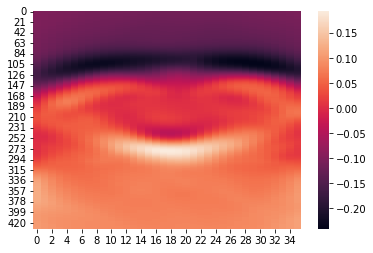

In [122]:
# mf.show(np.load(r"C:\Users\lkxl1\OneDrive\デスクトップ\research\imgout\snap77split1\2\2_magfieldx.01.14.npy"))
num = 8
mf.show(np.load(rf"C:\Users\lkxl1\OneDrive\デスクトップ\research\imgout\snap49split2\magfieldx\{num}\{num}_magfieldx.04.14.npy"))

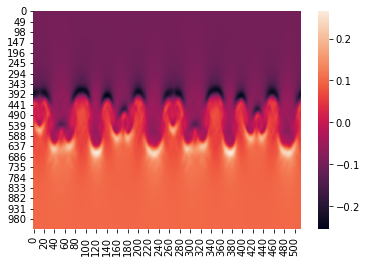

In [6]:
mf.show(mf.load(mf.gen_snap_path("magfieldx", 1,14,49)))

In [25]:
def change_sepy(xrange:list):
    res = [0,0]
    for i in range(2):
        res[i] = mf.AVSlat2bilat(77, [0,xrange[i]])[1]
    return res
sepy = [[330,650]]
sep = list(map(change_sepy, sepy))

In [ ]:
mf.show(np.load(r"C:\Users\lkxl1\OneDrive\デスクトップ\research\imgout\snap77split1\2\2_magfieldx.01.14.npy"))

## ohnostrmの作成とhtml出力

In [8]:
#分割後の全てのnpyに対してohnostrmの作成
for i in range(9):
    for x in glob.glob(root_dir + f"imgout/snap49split2/magfieldx/{i}/*.npy"):
        xfile = x
        yfile = x.replace("magfieldx", "magfieldy")
        out = root_dir + f"imgout/snap49ohnosplit2/{i}/{i}_ohnostrm{x[-10:-4]}.bmp"
        mf.ohno_stream(xfile, yfile, out)

['C:/Users/TsugiKawa/Desktop/research_kawa/src/mymodule/StreamLines/FieldLines.exe', 'xtemp_ohnostrm_reading4737', 'ytemp_ohnostrm_reading2302', 'C:/Users/TsugiKawa/Desktop/research_kawa/imgout/snap49ohnosplit2/0/0_ohnostrm.01.00.bmp', '36', '432']
['C:/Users/TsugiKawa/Desktop/research_kawa/src/mymodule/StreamLines/FieldLines.exe', 'xtemp_ohnostrm_reading1085', 'ytemp_ohnostrm_reading4388', 'C:/Users/TsugiKawa/Desktop/research_kawa/imgout/snap49ohnosplit2/0/0_ohnostrm.01.01.bmp', '36', '432']
['C:/Users/TsugiKawa/Desktop/research_kawa/src/mymodule/StreamLines/FieldLines.exe', 'xtemp_ohnostrm_reading5419', 'ytemp_ohnostrm_reading8813', 'C:/Users/TsugiKawa/Desktop/research_kawa/imgout/snap49ohnosplit2/0/0_ohnostrm.01.02.bmp', '36', '432']
['C:/Users/TsugiKawa/Desktop/research_kawa/src/mymodule/StreamLines/FieldLines.exe', 'xtemp_ohnostrm_reading1452', 'ytemp_ohnostrm_reading4668', 'C:/Users/TsugiKawa/Desktop/research_kawa/imgout/snap49ohnosplit2/0/0_ohnostrm.01.03.bmp', '36', '432']
['C:

KeyboardInterrupt: 

In [26]:
#分割後の全てのnpyに対してohnostrmの作成

for i in range(9):
    for x in glob.glob(root_dir + f"imgout/snap49split1/magfieldx/{i}/*.npy"):
        xfile = x
        yfile = x.replace("magfieldx", "magfieldy")
        out = root_dir + f"imgout/snap49ohnosplit1/{i}/{i}_ohnostrm{x[-10:-4]}.bmp"
        mf.ohno_stream(xfile, yfile, out)

In [ ]:
#分割後の全てのnpyに対してohnostrmの作成
for i in range(9):
    for x in glob.glob(root_dir + f"imgout/snap77split1/magfieldx/{i}/*.npy"):
        xfile = x
        yfile = x.replace("magfieldx", "magfieldy")
        out = root_dir + f"imgout/snap77ohnosplit1/{i}/{i}_ohnostrm{x[-10:-4]}.bmp"
        mf.ohno_stream(xfile, yfile, out)

In [ ]:
#ohnostrmのhtmlまとめ
# targetdir = root_dir + "imgout/snap49ohnosplit1/"
for targetdir in ["../imgout/snap49ohnosplit2/", "../imgout/snap49ohnosplit1/", "../imgout/snap77ohnosplit1/"]:
    for i in range(9):
        sortedpath = mf.sort_paths(glob.glob(targetdir + f"{i}/*"), paraloc=[-9,-8], jobloc=[-6,-5])
        fpath = targetdir + f"{os.path.basename(targetdir[:-1])}_{i}sorted.html"
        f = open(fpath, "w")
        f.write(f'<html lang="ja"><head><title>{os.path.basename(targetdir[:-1])}</title></head><body>')
        f.close()
        f = open(fpath, "a")
        for path in sortedpath:
            f.write(f"<div><p>{os.path.basename(path)}</p><p><img src='./{i}/{os.path.basename(path)}'></p></div>")
        f.close()

In [ ]:
# labeling用csv
for targetdir in ["../imgout/snap49ohnosplit1/", "../imgout/snap49ohnosplit2/", "../imgout/snap77ohnosplit1/"]:
    for i in range(9):
        sortedpath = mf.sort_paths(glob.glob(targetdir + f"{i}/*"), paraloc=[-9,-8], jobloc=[-6,-5])
        fpath = targetdir + f"{os.path.basename(targetdir[:-1])}_{i}.csv"
        f = open(fpath, "w")
        f.write(f',path,is_reconnecting1,is_reconnecting2\n')
        f.close()
        f = open(fpath, "a")

        index = 0
        for path in sortedpath:
            f.write(f"{index},{path},,\n")
            index+=1
        f.close()
